In [67]:
import tensorflow as tf
from tensorflow import keras

#Laster inn datasettet
image_size = (180, 180)
batch_size = 32
train_ds = keras.preprocessing.image_dataset_from_directory(
    "face_age",
    validation_split=0.2,
    subset="training",
    seed=1337,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    "face_age",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size,
)

Found 9778 files belonging to 99 classes.
Using 7823 files for training.
Found 9778 files belonging to 99 classes.
Using 1955 files for validation.


<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

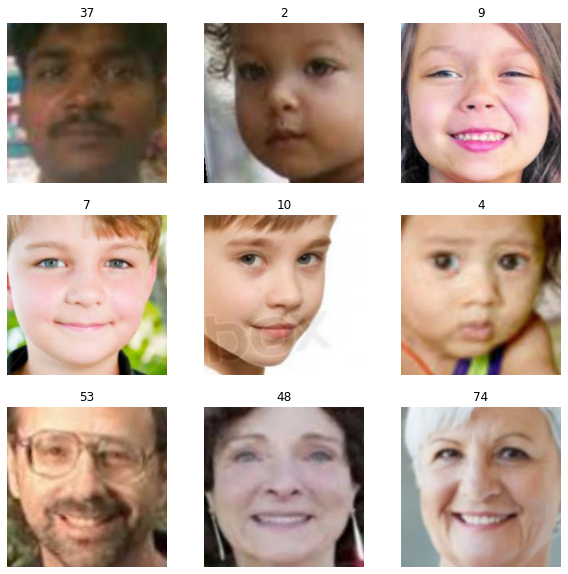

In [19]:
import matplotlib.pyplot as plt
#Viser fram et tilfeldig utvalg av bildene og alder
plt.figure(figsize=(10,10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    horizontal_flip = True,
)

In [77]:
#Litt usikker på hvorfor, må finne ut mere
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [106]:
def build_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                   padding="valid",
                   input_shape=(180, 180, 3)))
    model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation="linear")) 
    return model

model = build_model()

model.compile(optimizer="adam",loss="mean_absolute_error",metrics=['mean_absolute_error'])

In [108]:
epochs = 50

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
245/245 [==============================] - ETA: 0s - loss: -375.4599 - accuracy: 0.0459WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x29004f550> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBO

KeyboardInterrupt: 